In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 2
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on the test images: %d %%' % (100 * correct / total))


[1,   100] loss: 0.744
[1,   200] loss: 0.208
[1,   300] loss: 0.132
[1,   400] loss: 0.096
[1,   500] loss: 0.081
[1,   600] loss: 0.078
[1,   700] loss: 0.060
[1,   800] loss: 0.068
[1,   900] loss: 0.067
[2,   100] loss: 0.044
[2,   200] loss: 0.038
[2,   300] loss: 0.050
[2,   400] loss: 0.047
[2,   500] loss: 0.048
[2,   600] loss: 0.045
[2,   700] loss: 0.050
[2,   800] loss: 0.045
[2,   900] loss: 0.045
Finished Training
Accuracy on the test images: 98 %


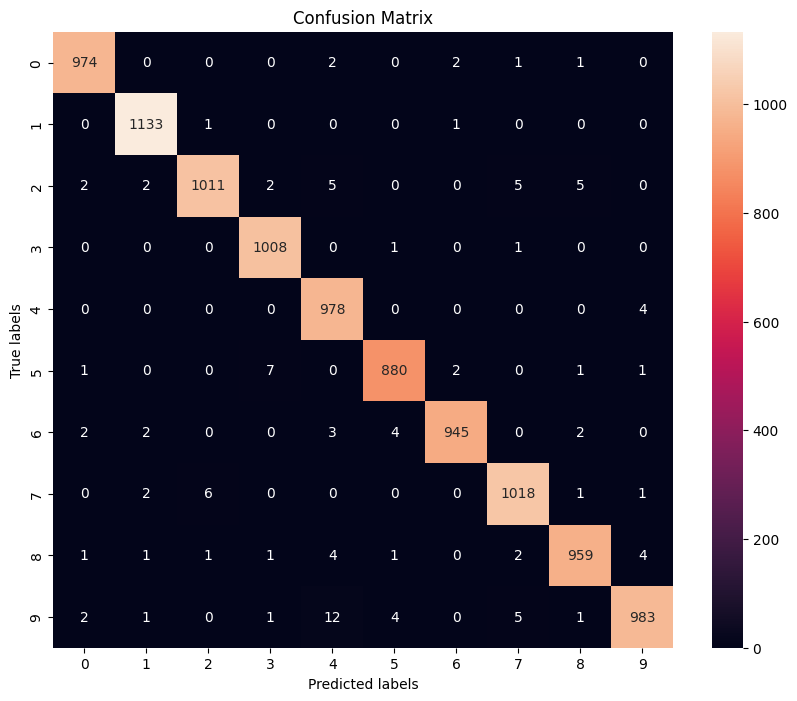

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# Define a function to plot the confusion matrix
def plot_confusion_matrix(model, test_loader):
    model.eval()
    y_pred = []
    y_true = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.tolist())
            y_true.extend(labels.tolist())

    confusion_mtx = np.zeros((10, 10), dtype=np.int32)

    for true_label, pred_label in zip(y_true, y_pred):
        confusion_mtx[true_label][pred_label] += 1

    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, annot=True, fmt='g', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(model, test_loader)
